In [1]:
import pandas as pd
from matplotlib import pyplot as plt

path = "data/from_MARS/average_pLDDT.csv"
path = "data/from_MARS/pLDDT_stats.csv"
path = "data/from_MARS/pLDDT_stats_plus.csv"

In [2]:
df = pd.read_csv(
    path,
    names=("fn",
            "mean",
            "median",
            "stdev",
            "var",
            "max",
            "min",
            "perc_confident"
    )
)

array([<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>,
       <Axes: ylabel='Frequency'>], dtype=object)

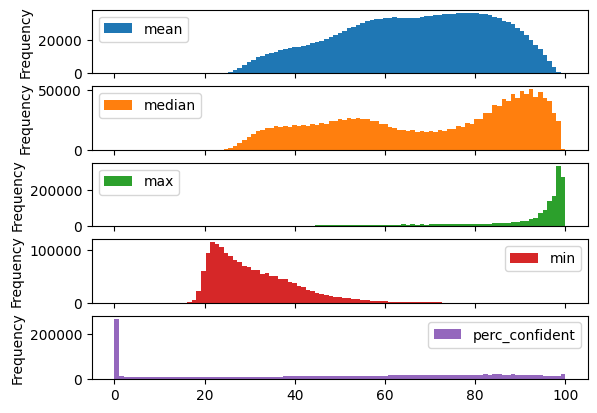

In [4]:
df[["mean", "median", "max", "min" , "perc_confident"]].plot(kind="hist", subplots=True, bins=99)

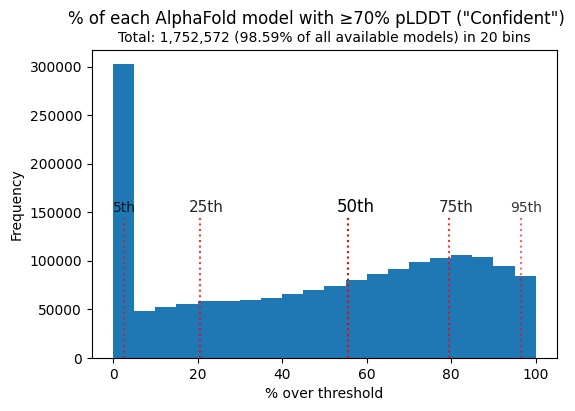

In [105]:
fig, ax = plt.subplots(figsize = (6,4))

# df[(df["perc_confident"] > 5) & (df["perc_confident"] < 100)].plot(kind="hist", y="perc_confident")
pc = df["perc_confident"]
pc.plot(kind="hist", bins=20)
quant_5, quant_25, quant_50, quant_75, quant_95 = pc.quantile(0.05), pc.quantile(0.25), pc.quantile(0.5), pc.quantile(0.75), pc.quantile(0.95)

# [quantile, opacity, length]
quants = [[quant_5, 0.6, 0.46], [quant_25, 0.8, 0.46], [quant_50, 1, 0.46],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.46]]

# # Plot the lines with a loop
for i in quants:
    ax.axvline(i[0]+2.5, alpha = i[1], ymax = i[2], linestyle = ":", color="red")
ax.text(quant_5, 150000, "5th", size = 10, alpha = 0.8)
ax.text(quant_25, 150000, "25th", size = 11, alpha = 0.85)
ax.text(quant_50, 150000, "50th", size = 12, alpha = 1)
ax.text(quant_75, 150000, "75th", size = 11, alpha = 0.85)
ax.text(quant_95, 150000, "95th", size = 10, alpha =.8)
ax.set_xlabel("% over threshold")
plt.suptitle("% of each AlphaFold model with \u226570% pLDDT (\"Confident\")")
plt.title(
    "Total: {:,} ({}% of all available models) in 20 bins".format(len(df), round(100*len(df)/1777547, 2)),
    fontsize=10)
plt.show()


mean                 Axes(0.125,0.11;0.0945122x0.77)
median            Axes(0.238415,0.11;0.0945122x0.77)
stdev             Axes(0.351829,0.11;0.0945122x0.77)
var               Axes(0.465244,0.11;0.0945122x0.77)
max               Axes(0.578659,0.11;0.0945122x0.77)
min               Axes(0.692073,0.11;0.0945122x0.77)
perc_confident    Axes(0.805488,0.11;0.0945122x0.77)
dtype: object

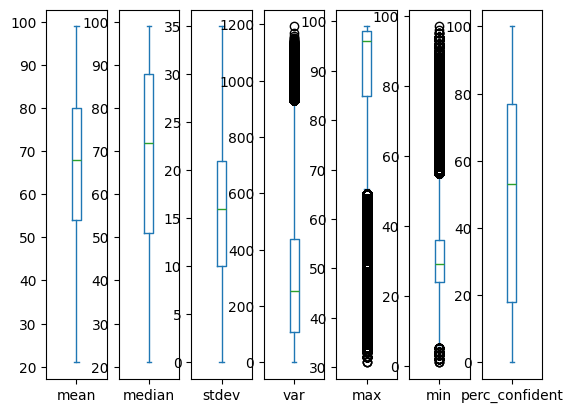

In [6]:
df.plot(kind="box", subplots=True)

In [6]:
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{:.1f}%\n({v:,})'.format(pct, v=val)
    return my_format

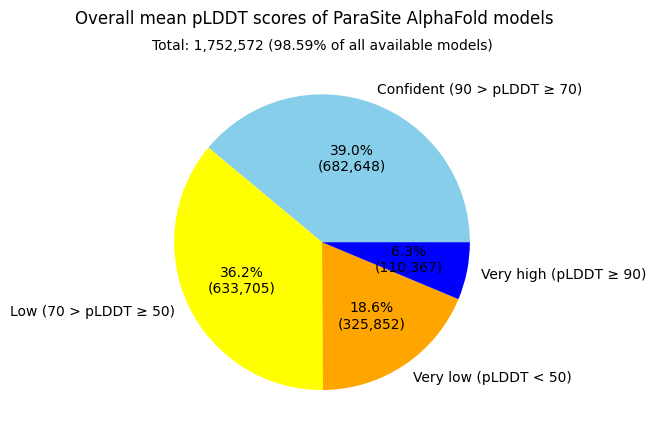

In [40]:
label = "mean"
df["overall_confidence"] = ""
df.loc[df[label] < 50, "overall_confidence"] = "Very Low"
df.loc[(df[label] >= 50) & (df[label] < 70), "overall_confidence"] = "Low"
df.loc[(df[label] >= 70) & (df[label] < 90), "overall_confidence"] = "Confident"
df.loc[df[label] >= 90, "overall_confidence"] = "Very High"

s = df.overall_confidence.value_counts()
fig, ax = plt.subplots()
colors = {
    "Very High": "blue",
    "Confident": "skyblue",
    "Low": "yellow",
    "Very Low": "orange"
}
labels = {
    "Very High": "Very high (pLDDT \u2265 90)",
    "Confident": "Confident (90 > pLDDT \u2265 70)",
    "Low": "Low (70 > pLDDT \u2265 50)",
    "Very Low": "Very low (pLDDT < 50)"
}
ax.pie(s,
    labels=[labels[key] for key in s.index],
    autopct=autopct_format(s),
    colors=[colors[key] for key in s.index],
)
plt.suptitle("Overall {} pLDDT scores of ParaSite AlphaFold models".format(label, len(df)))
plt.title(
    "Total: {:,} ({}% of all available models)".format(len(df), round(100*len(df)/1777547, 2)),
    fontsize=10)
plt.show()

In [25]:
df.sort_values("mean")

,fn,mean,median,overall_confidence
771469,AF-A0A498SVS6-F1-model_v4.pdb,0,0,Very Low
65763,AF-A0A0B2VL62-F1-model_v4.pdb,21,20,Very Low
1140214,AF-A0A0V1N064-F1-model_v4.pdb,22,22,Very Low
225724,AF-A0A0V1EEK3-F1-model_v4.pdb,22,21,Very Low
555470,AF-A0A0V0Y800-F1-model_v4.pdb,22,21,Very Low
...,...,...,...,...
569841,AF-G7YYM3-F1-model_v4.pdb,98,98,Very High
1464218,AF-G4LWI3-F1-model_v4.pdb,98,98,Very High
1657975,AF-A0A1I7SFU1-F1-model_v4.pdb,98,98,Very High
713899,AF-A0A0V1F2C9-F1-model_v4.pdb,98,98,Very High
